# MB208 Grant Proposal
## Atharv Suryawanshi
## 20582

In [22]:
from neuron import h 
from neuron.units import mV, ms
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
h.load_file("stdrun.hoc")
if h.load_file("C:/Users/Dell/Documents/Python/TCN/Grant Proposal/Codes/cella.hoc") and h.load_file("C:/Users/Dell/Documents/Python/TCN/Grant Proposal/Codes/cellb.hoc") and h.load_file("C:/Users/Dell/Documents/Python/TCN/Grant Proposal/Codes/cellc.hoc"):
    print("Morphologies loaded")
    # each neuron has 1 soma, 1a, 2a, 3a 0-8, 4a 0-9
if h.nrn_load_dll("C:/Users\Dell\Documents\Python\TCN\Grant Proposal\Codes\MOD_files/nrnmech.dll"):
    print("Mod files loaded")

Morphologies loaded
Mod files loaded


In [3]:
h.somaa.Ra, h.somaa.cm = 134, 1

Here we will show how 3 cells are connected and their basic dynamics. 

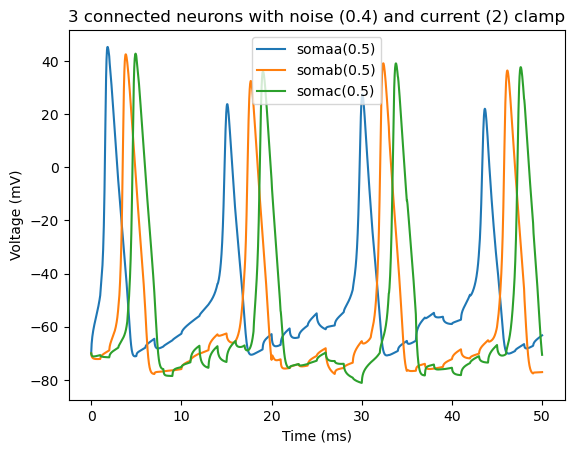

In [4]:
for sec in h.allsec():
    sec.insert('hh')
tstop = 50
noise_amp = 0.5
noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
clampa = current_clamp(h.somaa(0.5),0,tstop,2)
all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 

plot_vt(all_v,t,labels)


We will explicitly show the phase locked nature of neurons here. 

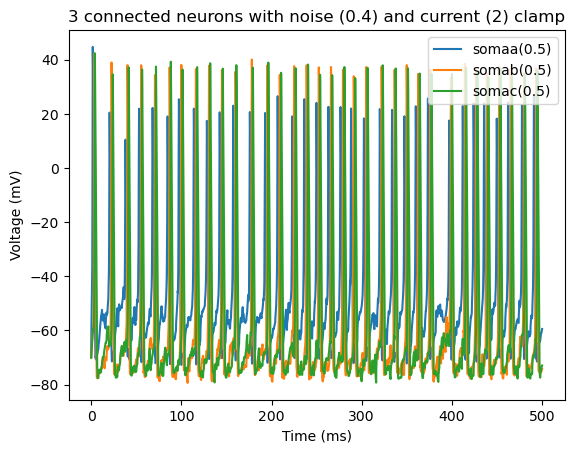

In [12]:
for sec in h.allsec():
    sec.insert('hh')
tstop = 500
noise_amp = 0.4
noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
clampa = current_clamp(h.somaa(0.5),0,tstop,2)
all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 
plot_vt(all_v,t,labels)


0.17032910874893079
0.018222515442055675


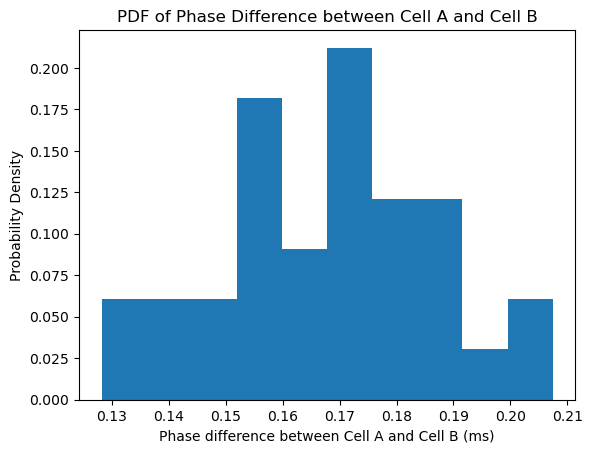

0.259709730171637
0.025555805101401693


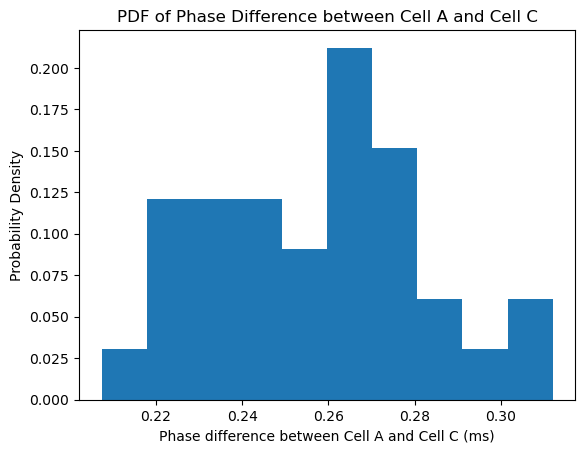

In [19]:
# For Cell A and Cell B
# For Cell A and Cell B
phase_diff = phase_difference(array=[all_v[0],all_v[1]],t=t,labels=labels[:2])
weights = np.ones_like(phase_diff) / len(phase_diff)
print(np.median(phase_diff))
print(np.std(phase_diff))   
plt.hist(phase_diff, weights=weights)
plt.xlabel('Phase difference between Cell A and Cell B (ms)')
plt.ylabel('Probability Density')
plt.title('PDF of Phase Difference between Cell A and Cell B')
plt.show()

# For Cell A and Cell C
phase_diff = phase_difference(array=[all_v[0],all_v[2]],t=t,labels=labels)
weights = np.ones_like(phase_diff) / len(phase_diff)
print(np.median(phase_diff))
print(np.std(phase_diff))   
plt.hist(phase_diff, weights=weights)
plt.xlabel('Phase difference between Cell A and Cell C (ms)')
plt.ylabel('Probability Density')
plt.title('PDF of Phase Difference between Cell A and Cell C')
plt.show()


0.08922103759626192
0.013456307837949648


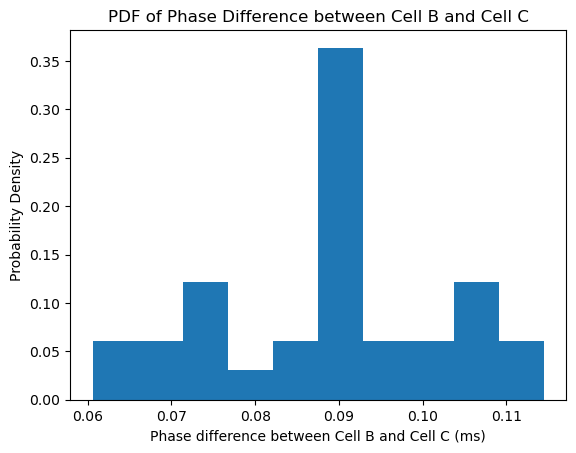

In [20]:

# For Cell B and Cell C
phase_diff = phase_difference(array=[all_v[1],all_v[2]],t=t,labels=labels)
weights = np.ones_like(phase_diff) / len(phase_diff)
print(np.median(phase_diff))
print(np.std(phase_diff))
plt.hist(phase_diff, weights=weights)
plt.xlabel('Phase difference between Cell B and Cell C (ms)')
plt.ylabel('Probability Density')
plt.title('PDF of Phase Difference between Cell B and Cell C')
plt.show()


With this low stdev, we can say that these cells are phase locked despite the noise. 

Now we will show how phase difference is affected by cell junction characteristics.

100%|██████████| 10/10 [01:28<00:00,  8.88s/it]


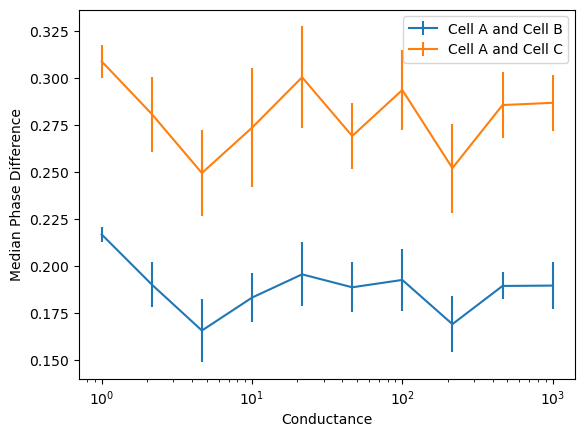

In [47]:
from tqdm import tqdm
medians_ab = []
std_devs_ab = []
medians_ac = []
std_devs_ac = []
tstop = 500
noise_amp = 0.4
conductances = np.logspace(0, 3, 10)
for i in tqdm(conductances):
    noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
    noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
    noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
    gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
    gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
    clampa = current_clamp(h.somaa(0.5),0,tstop,2)
    all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 
    # plot_vt(all_v,t,labels)

    phase_diff_ab = phase_difference(array=[all_v[0],all_v[1]],t=t,labels=labels[:2])
    medians_ab.append(np.median(phase_diff_ab))
    std_devs_ab.append(np.std(phase_diff_ab))

    phase_diff_ac = phase_difference(array=[all_v[0],all_v[2]],t=t,labels=labels)
    medians_ac.append(np.median(phase_diff_ac))
    std_devs_ac.append(np.std(phase_diff_ac))

# plot medians with respect to conductance
plt.figure()
plt.errorbar(conductances, medians_ab, yerr=std_devs_ab, label='Cell A and Cell B')
plt.errorbar(conductances, medians_ac, yerr=std_devs_ac, label='Cell A and Cell C')
plt.xscale('log')
plt.xlabel('Conductance')
plt.ylabel('Median Phase Difference')
plt.legend()
plt.show()

1it [00:10, 10.10s/it]

10.0
16.68100537200059


2it [00:18,  9.35s/it]

27.825594022071243


4it [00:37,  9.15s/it]

46.41588833612777
77.4263682681127


6it [00:54,  9.01s/it]

129.1549665014884
215.44346900318823


8it [01:12,  9.02s/it]

359.38136638046257
599.4842503189409


10it [01:30,  9.06s/it]

1000.0


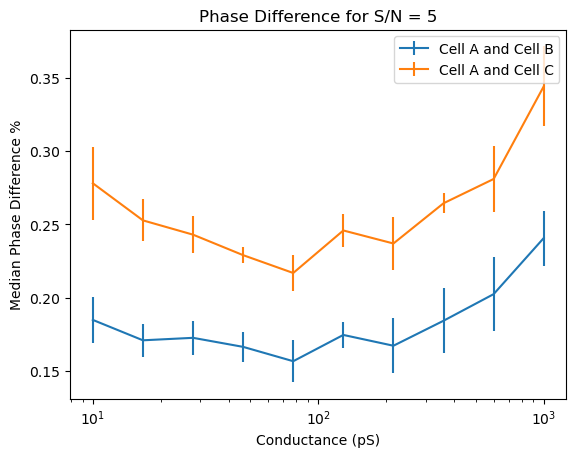

In [24]:
tstop = 500
noise_amp = 0.4
conductances = np.logspace(1, 3, 10)

medians_ab = np.zeros_like(conductances)
std_devs_ab = np.zeros_like(conductances)
medians_ac = np.zeros_like(conductances)
std_devs_ac = np.zeros_like(conductances)

for idx, i in tqdm(enumerate(conductances)):
    print(i)
    noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
    noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
    noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
    gap1, gap2 = gap_between(i, h.dend4a[8](1), h.dend4b[8](1))
    gap3, gap4 = gap_between(i, h.dend4b[9](1), h.dend4c[9](1))
    clampa = current_clamp(h.somaa(0.5),0,tstop,2)
    all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 

    phase_diff_ab = phase_difference(array=[all_v[0],all_v[1]],t=t,labels=labels[:2])
    medians_ab[idx] = np.median(phase_diff_ab)
    std_devs_ab[idx] = np.std(phase_diff_ab)

    phase_diff_ac = phase_difference(array=[all_v[0],all_v[2]],t=t,labels=labels)
    medians_ac[idx] = np.median(phase_diff_ac)
    std_devs_ac[idx] = np.std(phase_diff_ac)

# plot medians with respect to conductance
plt.figure()
plt.errorbar(conductances, medians_ab, yerr=std_devs_ab, label='Cell A and Cell B')
plt.errorbar(conductances, medians_ac, yerr=std_devs_ac, label='Cell A and Cell C')
plt.xscale('log')
plt.title('Phase Difference for S/N = 5')
plt.xlabel('Conductance (pS)')
plt.ylabel('Median Phase Difference %')
plt.legend()
plt.show()

0it [00:00, ?it/s]c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
1it [00:09,  9.75s/it]

1.0
2.154434690031884


3it [00:27,  9.13s/it]

4.641588833612778
10.0


4it [00:36,  8.85s/it]

21.544346900318832


6it [00:53,  8.76s/it]

46.41588833612777
100.0


8it [01:11,  8.75s/it]

215.44346900318823
464.15888336127773


10it [01:29,  8.91s/it]

1000.0


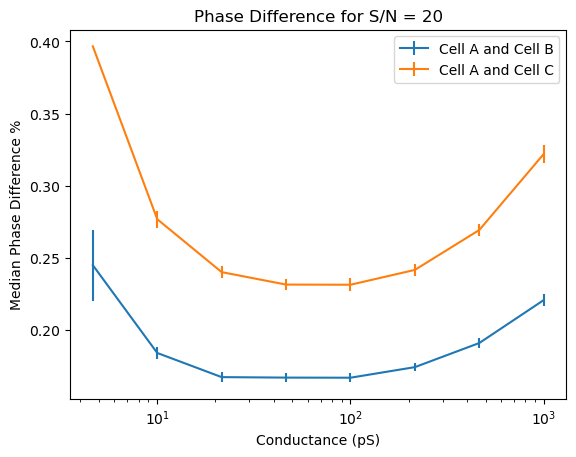

In [25]:
tstop = 500
noise_amp = 0.1
conductances = np.logspace(0, 3, 10)

medians_ab = np.zeros_like(conductances)
std_devs_ab = np.zeros_like(conductances)
medians_ac = np.zeros_like(conductances)
std_devs_ac = np.zeros_like(conductances)

for idx, i in tqdm(enumerate(conductances)):
    print(i)
    noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
    noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
    noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
    gap1, gap2 = gap_between(i, h.dend4a[8](1), h.dend4b[8](1))
    gap3, gap4 = gap_between(i, h.dend4b[9](1), h.dend4c[9](1))
    clampa = current_clamp(h.somaa(0.5),0,tstop,2)
    all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 

    phase_diff_ab = phase_difference(array=[all_v[0],all_v[1]],t=t,labels=labels[:2])
    medians_ab[idx] = np.median(phase_diff_ab)
    std_devs_ab[idx] = np.std(phase_diff_ab)

    phase_diff_ac = phase_difference(array=[all_v[0],all_v[2]],t=t,labels=labels)
    medians_ac[idx] = np.median(phase_diff_ac)
    std_devs_ac[idx] = np.std(phase_diff_ac)

# plot medians with respect to conductance
plt.figure()
plt.errorbar(conductances, medians_ab, yerr=std_devs_ab, label='Cell A and Cell B')
plt.errorbar(conductances, medians_ac, yerr=std_devs_ac, label='Cell A and Cell C')
plt.xscale('log')
plt.title('Phase Difference for S/N = 20')
plt.xlabel('Conductance (pS)')
plt.ylabel('Median Phase Difference %')
plt.legend()
plt.show()

Lets look at the correlation between network activity of these neurons in case of noise.

In [32]:
tstop = 500
noise_amp = 0.4
noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
clampa = current_clamp(h.somaa(0.5),0,tstop,2)
all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 
correlation_matrix = np.corrcoef(all_v)

print("Correlation between cell A and B:", correlation_matrix[0, 1])
print("Correlation between cell A and C:", correlation_matrix[0, 2])
print("Correlation between cell B and C:", correlation_matrix[1, 2])



Correlation between cell A and B: -0.28350799471195015
Correlation between cell A and C: -0.3082799641423331
Correlation between cell B and C: 0.36951526904139653


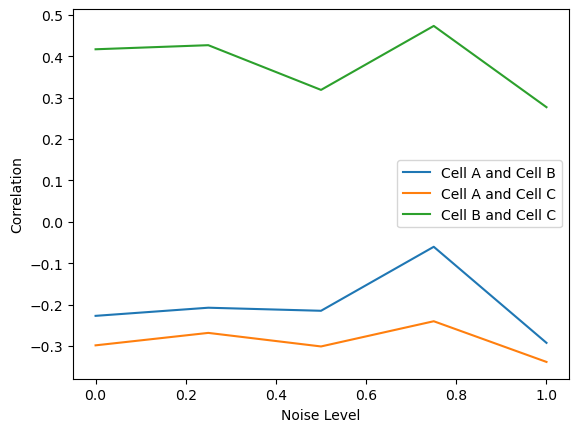

In [35]:
tstop = 100
noise_levels = np.linspace(0, 1, 5)  # adjust as needed

correlations_ab = []
correlations_ac = []
correlations_bc = []

for noise_amp in noise_levels:
    noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
    noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
    noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
    gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
    gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
    clampa = current_clamp(h.somaa(0.5),0,tstop,2)
    all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 
    correlation_matrix = np.corrcoef(all_v)

    correlations_ab.append(correlation_matrix[0, 1])
    correlations_ac.append(correlation_matrix[0, 2])
    correlations_bc.append(correlation_matrix[1, 2])

# plot correlations with respect to noise levels
plt.figure()
plt.plot(noise_levels, correlations_ab, label='Cell A and Cell B')
plt.plot(noise_levels, correlations_ac, label='Cell A and Cell C')
plt.plot(noise_levels, correlations_bc, label='Cell B and Cell C')
plt.xlabel('Noise Level')
plt.ylabel('Correlation')
plt.legend()
plt.show()

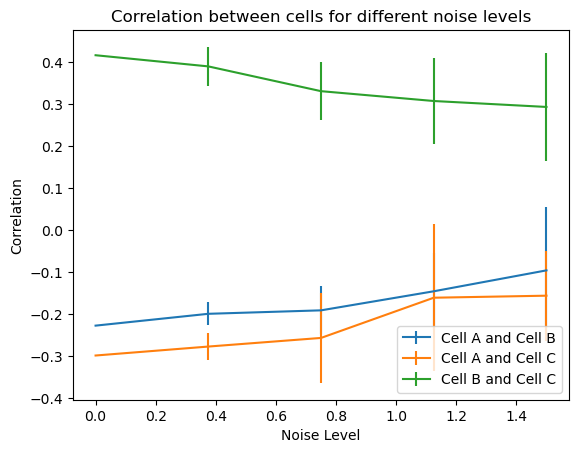

In [27]:
tstop = 100
noise_levels = np.linspace(0, 1.5, 5)  
n_trials = 5

correlations_ab = np.zeros((n_trials, len(noise_levels)))
correlations_ac = np.zeros((n_trials, len(noise_levels)))
correlations_bc = np.zeros((n_trials, len(noise_levels)))

for trial in range(n_trials):
    for idx, noise_amp in enumerate(noise_levels):
        noisea = noise_clamp(h.somaa(0.5),0,tstop,noise_amp)
        noiseb = noise_clamp(h.somab(0.5),0,tstop, noise_amp)
        noisec = noise_clamp(h.somac(0.5),0,tstop, noise_amp)
        gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
        gap3, gap4 = gap_between(1e1, h.dend4b[9](1), h.dend4c[9](1))
        clampa = current_clamp(h.somaa(0.5),0,tstop,2)
        all_v,t, labels = simulate_v_t([h.somaa(0.5),h.somab(0.5),h.somac(0.5)],tstop) 
        correlation_matrix = np.corrcoef(all_v)

        correlations_ab[trial, idx] = correlation_matrix[0, 1]
        correlations_ac[trial, idx] = correlation_matrix[0, 2]
        correlations_bc[trial, idx] = correlation_matrix[1, 2]

# calculate means and standard deviations
means_ab = correlations_ab.mean(axis=0)
stds_ab = correlations_ab.std(axis=0)
means_ac = correlations_ac.mean(axis=0)
stds_ac = correlations_ac.std(axis=0)
means_bc = correlations_bc.mean(axis=0)
stds_bc = correlations_bc.std(axis=0)

# plot correlations with respect to noise levels with error bars
plt.figure()
plt.errorbar(noise_levels, means_ab, yerr=stds_ab, label='Cell A and Cell B')
plt.errorbar(noise_levels, means_ac, yerr=stds_ac, label='Cell A and Cell C')
plt.errorbar(noise_levels, means_bc, yerr=stds_bc, label='Cell B and Cell C')
plt.xlabel('Noise Level')
plt.ylabel('Correlation')
plt.title('Correlation between cells for different noise levels')
plt.legend()
plt.show()

In [30]:
%reset -f

NEURON: Couldn't find: Grant Proposal\Codes/cella.hoc
 near line 0
 

^


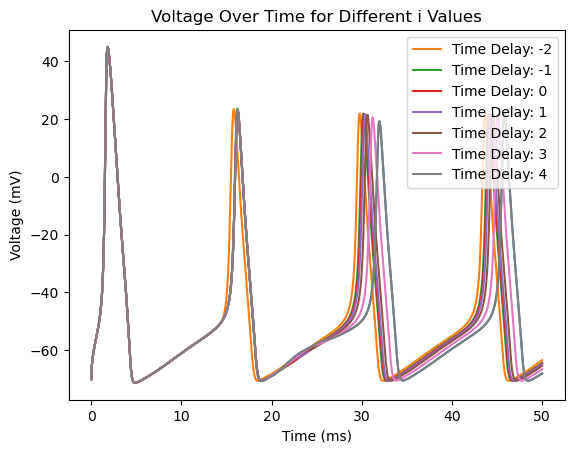

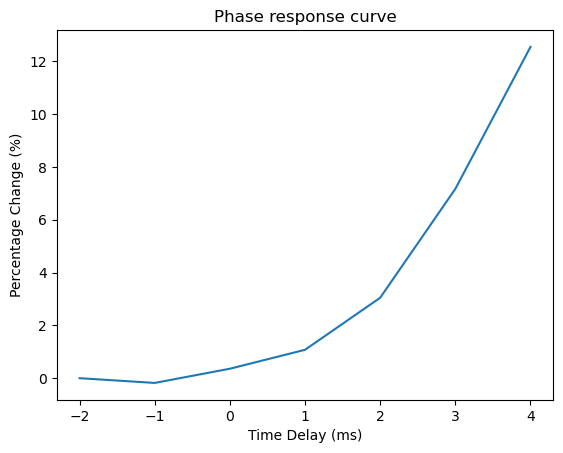

In [32]:
from neuron import h 
from neuron.units import mV, ms
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import correlate
import math
h.load_file("stdrun.hoc")
if h.load_file("Grant Proposal\Codes/cella.hoc") and h.load_file("Grant Proposal\Codes/cellb.hoc") and h.load_file("Grant Proposal\Codes/cellc.hoc"):
    print("Morphologies loaded")

if h.nrn_load_dll("Grant Proposal\Codes\MOD_files/nrnmech.dll"):
    print("Mod files loaded")

level = 1.6
for sec in h.allsec():
    sec.insert('hh')
tstop = 50
gap1, gap2 = gap_between(1e1, h.dend4a[8](1), h.dend4b[8](1))
clampa = current_clamp(h.somaa(0.5),0,tstop,2)
all_v,t, labels = simulate_v_t([h.somaa(0.5)],tstop)  
plt.figure()
plt.plot(t,all_v[0])
plt.title('Voltage Over Time for Different i Values')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
peaks, _ = find_peaks(all_v[0], height = -20)
arrays = []
second_peak_times = []
third_peak_times = []
i_values = list(range(-2,5,1))
for i in i_values:
    time_delay = t[peaks[1]]+i
    clampb = current_clamp(h.dend4a[8](1),time_delay,5,2)
    clampa = current_clamp(h.somaa(0.5),0,tstop,2)
    all_v1,t1, labels = simulate_v_t([h.somaa(0.5)],tstop)
    plt.plot(t1,all_v1[0], label = f'Time Delay: {i}')
    peaks1, _ = find_peaks(all_v1[0], height = -20)
    if len(peaks1) >= 3:
        second_peak_times.append(t1[peaks1[1]])
        third_peak_times.append(t1[peaks1[2]])
    else:
        second_peak_times.append(None)
        third_peak_times.append(None)
plt.legend()
plt.show()

# calculate time difference between 2nd and 3rd peaks
time_diff_2nd_3rd = np.array(third_peak_times) - np.array(second_peak_times)

# calculate percentage change of other time differences
percentage_change = (time_diff_2nd_3rd - time_diff_2nd_3rd[0]) / time_diff_2nd_3rd[0] * 100

# plot percentage change against i
plt.figure()
plt.plot(i_values, percentage_change)
plt.title('Phase response curve')
plt.xlabel('Time Delay (ms)')
plt.ylabel('Percentage Change (%)')
plt.show()
